# Determination of Membership Probability of Stars Using Machine Learning Algorithms - DBSCAN & GMM

In this particular project, I've utilised Gaia EDR3 Data of different Astronomical Parameters for Open Clusters (OpC) and implemented ML Clustering Algorithms from Scikit-learn to determine the membership probability of the clusters. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [82]:
odf = pd.read_csv('NGC_2818.csv')
print(len(odf))
df = odf.dropna() #NaN values reduces
print(len(df))
df

18786
16723


,_r,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,BP-RP
0,0.1531,139.043865,-36.626442,139.043811,-36.626425,0.8494,0.0291,-9.893,0.027,4.004,0.026,0,15.465279,0.002777,15.799797,0.010343,14.854594,0.011201,0.945203
1,0.1734,139.040803,-36.624890,139.040779,-36.624870,0.2850,0.0801,-4.362,0.074,4.496,0.074,0,17.516003,0.002915,17.917046,0.009534,16.953272,0.007885,0.963774
2,0.1854,139.043598,-36.626962,139.043573,-36.626941,0.3559,0.0306,-4.473,0.028,4.636,0.028,0,15.505557,0.002813,15.695607,0.009678,15.062265,0.019918,0.633342
3,0.2087,139.048453,-36.623314,139.048439,-36.623309,1.7109,1.0734,-2.425,0.841,1.082,1.163,0,20.706453,0.009231,20.788280,0.186581,20.103979,0.284738,0.684301
4,0.2106,139.039938,-36.623092,139.039911,-36.623081,0.3188,0.0592,-4.902,0.053,2.375,0.057,0,16.963066,0.002818,17.448677,0.006358,16.322868,0.006041,1.125809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,19.9936,139.457433,-36.591372,139.457294,-36.591339,3.5404,0.0127,-25.082,0.010,7.416,0.014,0,10.202715,0.002761,10.521051,0.002801,9.719567,0.003785,0.801484
18781,19.9939,138.817980,-36.344688,138.817958,-36.344668,-0.0780,0.3353,-3.964,0.291,4.442,0.357,0,19.950138,0.004646,20.600895,0.073918,19.261694,0.038960,1.339201
18783,19.9957,139.267550,-36.905094,139.267489,-36.905059,2.2909,0.5870,-10.893,0.447,7.816,0.670,0,20.328917,0.005955,21.428720,0.135413,19.307070,0.042970,2.121651
18784,19.9962,139.301147,-36.362379,139.301127,-36.362366,1.1162,0.7105,-3.630,0.521,2.923,0.690,0,20.433191,0.006243,20.919971,0.115393,19.729927,0.065124,1.190044


In [83]:
dup_df = df[df['Dup'] == 0]
dup_df

,_r,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,BP-RP
0,0.1531,139.043865,-36.626442,139.043811,-36.626425,0.8494,0.0291,-9.893,0.027,4.004,0.026,0,15.465279,0.002777,15.799797,0.010343,14.854594,0.011201,0.945203
1,0.1734,139.040803,-36.624890,139.040779,-36.624870,0.2850,0.0801,-4.362,0.074,4.496,0.074,0,17.516003,0.002915,17.917046,0.009534,16.953272,0.007885,0.963774
2,0.1854,139.043598,-36.626962,139.043573,-36.626941,0.3559,0.0306,-4.473,0.028,4.636,0.028,0,15.505557,0.002813,15.695607,0.009678,15.062265,0.019918,0.633342
3,0.2087,139.048453,-36.623314,139.048439,-36.623309,1.7109,1.0734,-2.425,0.841,1.082,1.163,0,20.706453,0.009231,20.788280,0.186581,20.103979,0.284738,0.684301
4,0.2106,139.039938,-36.623092,139.039911,-36.623081,0.3188,0.0592,-4.902,0.053,2.375,0.057,0,16.963066,0.002818,17.448677,0.006358,16.322868,0.006041,1.125809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18780,19.9936,139.457433,-36.591372,139.457294,-36.591339,3.5404,0.0127,-25.082,0.010,7.416,0.014,0,10.202715,0.002761,10.521051,0.002801,9.719567,0.003785,0.801484
18781,19.9939,138.817980,-36.344688,138.817958,-36.344668,-0.0780,0.3353,-3.964,0.291,4.442,0.357,0,19.950138,0.004646,20.600895,0.073918,19.261694,0.038960,1.339201
18783,19.9957,139.267550,-36.905094,139.267489,-36.905059,2.2909,0.5870,-10.893,0.447,7.816,0.670,0,20.328917,0.005955,21.428720,0.135413,19.307070,0.042970,2.121651
18784,19.9962,139.301147,-36.362379,139.301127,-36.362366,1.1162,0.7105,-3.630,0.521,2.923,0.690,0,20.433191,0.006243,20.919971,0.115393,19.729927,0.065124,1.190044


In [84]:
hdf = dup_df[dup_df['Plx'] >= 0] #non-neg parallex reduction
hdf

,_r,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,BP-RP
0,0.1531,139.043865,-36.626442,139.043811,-36.626425,0.8494,0.0291,-9.893,0.027,4.004,0.026,0,15.465279,0.002777,15.799797,0.010343,14.854594,0.011201,0.945203
1,0.1734,139.040803,-36.624890,139.040779,-36.624870,0.2850,0.0801,-4.362,0.074,4.496,0.074,0,17.516003,0.002915,17.917046,0.009534,16.953272,0.007885,0.963774
2,0.1854,139.043598,-36.626962,139.043573,-36.626941,0.3559,0.0306,-4.473,0.028,4.636,0.028,0,15.505557,0.002813,15.695607,0.009678,15.062265,0.019918,0.633342
3,0.2087,139.048453,-36.623314,139.048439,-36.623309,1.7109,1.0734,-2.425,0.841,1.082,1.163,0,20.706453,0.009231,20.788280,0.186581,20.103979,0.284738,0.684301
4,0.2106,139.039938,-36.623092,139.039911,-36.623081,0.3188,0.0592,-4.902,0.053,2.375,0.057,0,16.963066,0.002818,17.448677,0.006358,16.322868,0.006041,1.125809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,19.9935,139.370159,-36.830599,139.370212,-36.830650,1.2548,0.0190,9.557,0.017,-11.384,0.020,0,14.874553,0.002763,15.265113,0.003014,14.312900,0.003842,0.952213
18780,19.9936,139.457433,-36.591372,139.457294,-36.591339,3.5404,0.0127,-25.082,0.010,7.416,0.014,0,10.202715,0.002761,10.521051,0.002801,9.719567,0.003785,0.801484
18783,19.9957,139.267550,-36.905094,139.267489,-36.905059,2.2909,0.5870,-10.893,0.447,7.816,0.670,0,20.328917,0.005955,21.428720,0.135413,19.307070,0.042970,2.121651
18784,19.9962,139.301147,-36.362379,139.301127,-36.362366,1.1162,0.7105,-3.630,0.521,2.923,0.690,0,20.433191,0.006243,20.919971,0.115393,19.729927,0.065124,1.190044


In [85]:
#RUWE reduction
#ddf = hdf[hdf['RUWE'] < 1.2]
#print(len(ddf))

In [86]:
ddf = hdf[hdf['e_Gmag'] < 0.008] #common threshold error in Gmag be 0.005
ddf

,_r,_RAJ2000,_DEJ2000,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,Dup,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,BP-RP
0,0.1531,139.043865,-36.626442,139.043811,-36.626425,0.8494,0.0291,-9.893,0.027,4.004,0.026,0,15.465279,0.002777,15.799797,0.010343,14.854594,0.011201,0.945203
1,0.1734,139.040803,-36.624890,139.040779,-36.624870,0.2850,0.0801,-4.362,0.074,4.496,0.074,0,17.516003,0.002915,17.917046,0.009534,16.953272,0.007885,0.963774
2,0.1854,139.043598,-36.626962,139.043573,-36.626941,0.3559,0.0306,-4.473,0.028,4.636,0.028,0,15.505557,0.002813,15.695607,0.009678,15.062265,0.019918,0.633342
4,0.2106,139.039938,-36.623092,139.039911,-36.623081,0.3188,0.0592,-4.902,0.053,2.375,0.057,0,16.963066,0.002818,17.448677,0.006358,16.322868,0.006041,1.125809
5,0.2141,139.048423,-36.624998,139.048400,-36.624978,0.3129,0.0421,-4.226,0.040,4.566,0.040,0,16.388180,0.002795,16.733759,0.004255,15.890497,0.004572,0.843262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18779,19.9935,139.370159,-36.830599,139.370212,-36.830650,1.2548,0.0190,9.557,0.017,-11.384,0.020,0,14.874553,0.002763,15.265113,0.003014,14.312900,0.003842,0.952213
18780,19.9936,139.457433,-36.591372,139.457294,-36.591339,3.5404,0.0127,-25.082,0.010,7.416,0.014,0,10.202715,0.002761,10.521051,0.002801,9.719567,0.003785,0.801484
18783,19.9957,139.267550,-36.905094,139.267489,-36.905059,2.2909,0.5870,-10.893,0.447,7.816,0.670,0,20.328917,0.005955,21.428720,0.135413,19.307070,0.042970,2.121651
18784,19.9962,139.301147,-36.362379,139.301127,-36.362366,1.1162,0.7105,-3.630,0.521,2.923,0.690,0,20.433191,0.006243,20.919971,0.115393,19.729927,0.065124,1.190044


In [87]:
#RUWE reduction
#gdf = ddf[ddf['RUWE'] < 1.2]
#print(len(gdf))
gdf = ddf

12985


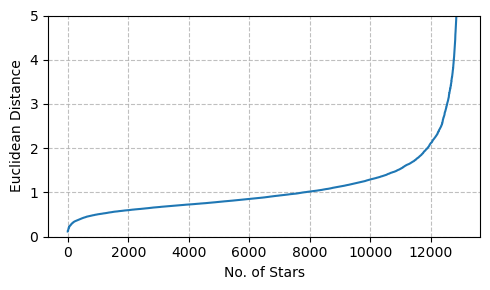

In [88]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(gdf) # fitting the data to the object
distances,indices=nbrs.kneighbors(gdf)
print(len(gdf))
gdf.head()

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.xlabel('No. of Stars')
plt.ylabel('Euclidean Distance')
plt.ylim(0,5)
#plt.xlim(0,14000)
plt.grid(True, alpha=0.8, linestyle ='--')
plt.show() # showing the plot

# DBSCAN_Algorithm

Here implementation of DBSCAN - Density-Based Spatial Clustering Of Applications With Noise, is done to determine the member stars of the open cluster. This ML Algorithm is very effective in determining high density regions with high accuracy even if there is a large background (noise). Utilises distances between two of the nearest points. There are two parameters for clustering:

1. eps_val 
2. min_samples

In [95]:
#DBSCAN ALGORITHM FOR CLUSTERING 
X_train = gdf[['_r' , '_RAJ2000' , '_DEJ2000', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag' ,'RPmag', 'e_RPmag', 'BP-RP']]
eps_val = 0.75
clustering = DBSCAN(eps = eps_val , min_samples = 2).fit(X_train) 
DB_df = X_train.copy()
DB_df.loc[:, 'Cluster'] = clustering.labels_

In [96]:
DB_df.Cluster.value_counts().to_frame().head()

,Cluster
-1,8596
0,528
202,317
563,192
798,113


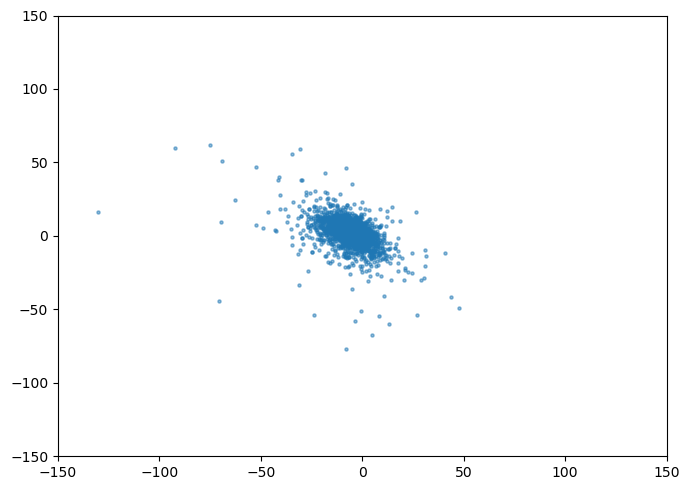

In [97]:
#Plot of the proper moion of the entire dataset
plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.scatter(DB_df.pmRA, DB_df.pmDE, s = 5, alpha = 0.5)
plt.xlim(-150,150)
plt.ylim(-150,150)
plt.show()

# Plotting the cluster (black) with the field stars(orange)


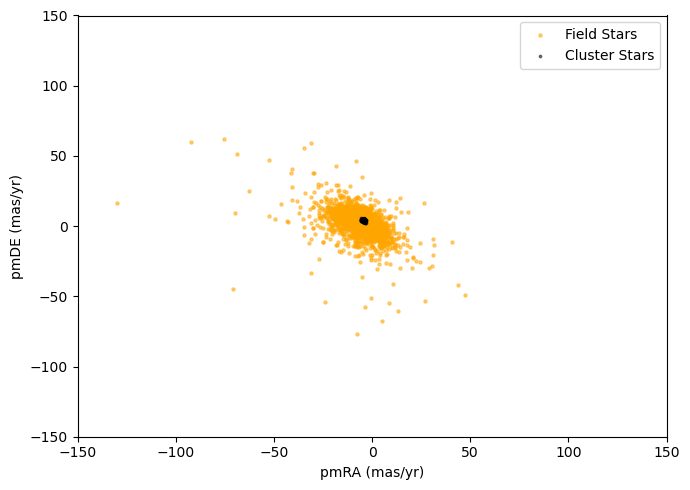

In [98]:
#possible cluster stars
clus = DB_df[DB_df['Cluster']==0] 
ent_cl = DB_df

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

#plt.scatter(outliners['pmRA'], outliners['pmDE'], s=1 , c="orange", label = 'Field Stars')

plt.scatter(DB_df.pmRA, DB_df.pmDE, s = 5, alpha = 0.5, c="orange", label = 'Field Stars')
plt.scatter(clus['pmRA'], clus['pmDE'], s=3 ,alpha = 0.5, color='black', label = 'Cluster Stars')

#plt.scatter(clus_2['pmRA'], clus_2['pmDE'], s=1 , color='blue')
#plt.scatter(clus_3['pmRA'], clus_3['pmDE'], s=1 , color='green')
#plt.scatter(clus_4['pmRA'], clus_4['pmDE'], s=1 , color='pink')

plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
plt.ylim(-150,150)
plt.xlim(-150,150)
plt.legend()
plt.show()

In [99]:
print('Number of Cluster stars after DBSCAN:' ,len(clus))

Number of Cluster stars after DBSCAN: 528


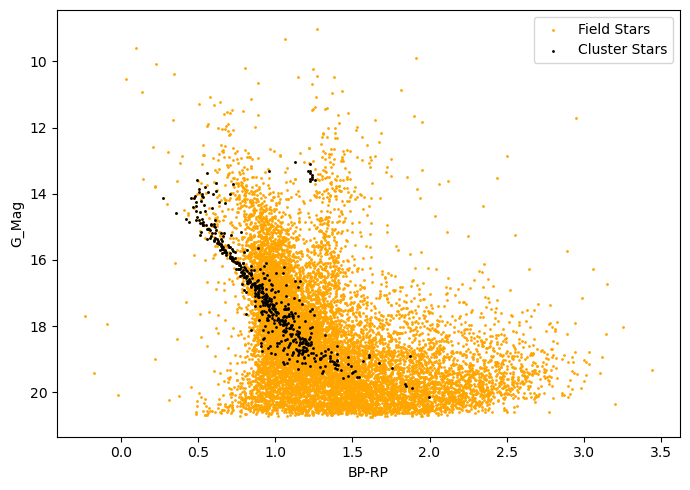

In [100]:
#BP-RP V/S G_Mag (HR_Diagram) Field & Cluster

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True
G_magnitude = DB_df.Gmag
BP_RP_og = [DB_df['BP-RP']]
G_magn = clus.Gmag
BP_RP = [clus['BP-RP']]
plt.scatter(BP_RP_og, G_magnitude, color = 'orange', s = 1 , label = 'Field Stars')
plt.scatter(BP_RP, G_magn , color = 'black', s = 1, label = 'Cluster Stars')
plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
#plt.ylim(10, 20)
#plt.xlim(0, 1.5)
plt.gca().invert_yaxis()
plt.legend()
plt.show()

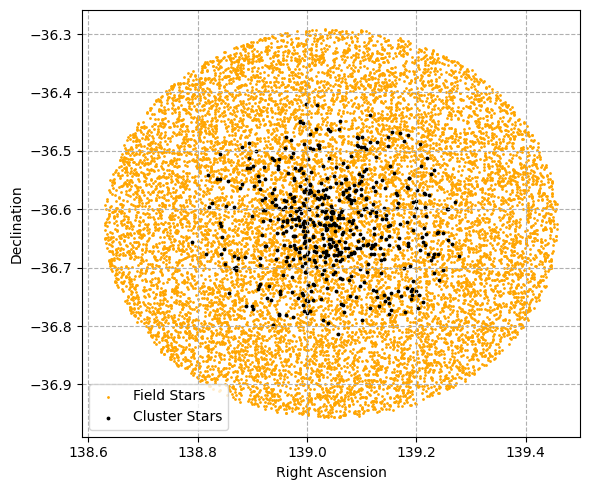

In [101]:
#Skyplots in RA and DEC
plt.rcParams["figure.figsize"] = [6.00, 5.00]
plt.rcParams["figure.autolayout"] = True
RA_og = DB_df._RAJ2000
DE_og = DB_df._DEJ2000
RA_cl = clus._RAJ2000
DE_cl = clus._DEJ2000
plt.scatter(RA_og, DE_og, color = 'orange', s = 1, label ='Field Stars')
plt.scatter(RA_cl, DE_cl, color = 'black', s = 3 , label = 'Cluster Stars')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.grid(True, alpha =1 , linestyle ='--')
plt.legend()
plt.show()

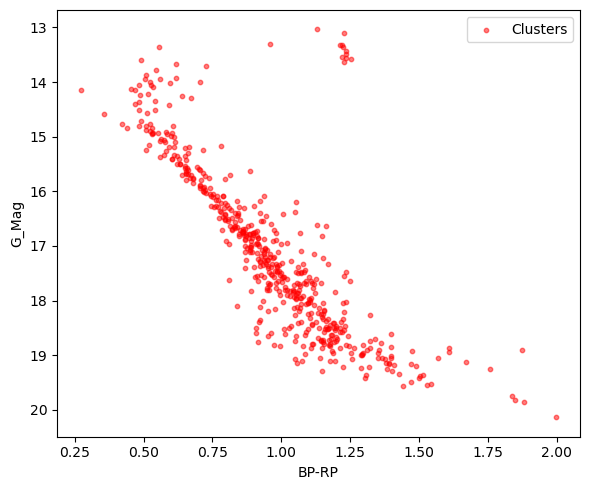

In [102]:
#cluster HR_diagram
plt.rcParams["figure.figsize"] = [6.00, 5.00]
plt.rcParams["figure.autolayout"] = True
G_magn = clus.Gmag
BP_RP = [clus['BP-RP']]
plt.scatter(BP_RP, G_magn , color = 'red',s= 10, alpha = 0.5, label='Clusters')
plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

In [103]:
#means required for Membership Probability through GMM
mean_RA = np.mean(clus._RAJ2000)
mean_DE = np.mean(clus._DEJ2000)
mean_pmRA = np.mean(clus.pmRA)
mean_pmDE = np.mean(clus.pmDE)
mean_Plx = np.mean(clus.Plx)
covar_pmRA = np.cov(clus.pmRA)
covar_pmDE = np.cov(clus.pmDE)

#central coordinates
print('Mean Right Ascension: %.2f' % mean_RA)
print('Mean Declination: %.2f' % mean_DE)
print('Covariance pmRA: %.2f' %covar_pmRA)
print('Covariance pmDE: %.2f' %covar_pmDE)

#proper motions and plx
print('Mean pmRA : %.2f' % mean_pmRA)
print('Mean pmDE: %.2f' % mean_pmDE)
print('Mean Parallex: %.4f' % mean_Plx)

Mean Right Ascension: 139.05
Mean Declination: -36.63
Covariance pmRA: 0.10
Covariance pmDE: 0.19
Mean pmRA : -4.43
Mean pmDE: 4.40
Mean Parallex: 0.2949


In [104]:
# Mean error in Plx
mean_e_Plx = np.mean(clus.e_Plx)
print('Mean error Parallex: %.4f' % mean_e_Plx)

Mean error Parallex: 0.0848


In [105]:
#Mean Parallex Calculations

mean_Plx = np.mean(clus.Plx)
print('Mean Plx: %.4f' %mean_Plx)

# 3 sigma cuts
sigma_3 = 3 * mean_e_Plx
max_Plx = mean_Plx + sigma_3
min_Plx = mean_Plx - sigma_3

print('Maximum Parallex: %.4f' %max_Plx)
print('Minimum Parallex: %.4f' %min_Plx)

Mean Plx: 0.2949
Maximum Parallex: 0.5494
Minimum Parallex: 0.0404


In [106]:
# 3 sigma cuts are applied
rdf = clus[clus['Plx'] >= min_Plx]
ndf = rdf[rdf['Plx'] <= max_Plx]
print(len(ndf))

512


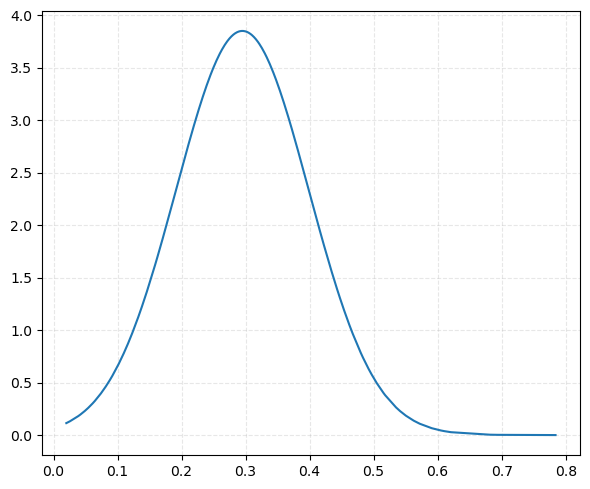

In [107]:
import scipy.stats as stats
stdv_Plx = np.std(clus.Plx) #standard deviation of Plx

#caculating the probabilty density function

pdf = stats.norm.pdf(clus['Plx'].sort_values(), mean_Plx, stdv_Plx)
#plt.hist(clus.Plx)

#plt.hist(clus.Plx)
plt.plot(clus['Plx'].sort_values(), pdf)
#plt.xlim([30,70])  
#plt.xlabel()    
#plt.ylabel()                
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

# GMM_Membership Probability

Using GMM to enhance the search for more probable clusters.

In [108]:
from sklearn.mixture import GaussianMixture as GM
from sklearn.metrics import silhouette_score

In [126]:
ds_X = ndf[['_r' , '_RAJ2000' , '_DEJ2000', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag' ,'RPmag', 'e_RPmag', 'BP-RP', 'Cluster']]
random_state_val = len(ndf) * 0.6
EM = GM(n_components = 3 ,random_state=300, init_params = 'k-means++')#change the random_state as close to 0.6 times the cluster size or 0
EM.fit(ds_X)
print(random_state_val)

307.2


In [127]:
mem_clus = EM.predict(ds_X)
EM.predict_proba(ds_X)

array([[9.57723680e-54, 5.35104368e-24, 1.00000000e+00],
       [9.99999632e-01, 2.79892971e-08, 3.40341224e-07],
       [9.99999920e-01, 3.12954890e-10, 7.96000952e-08],
       ...,
       [9.99911525e-01, 8.84668659e-05, 8.14237017e-09],
       [9.99997011e-01, 2.98932187e-06, 3.42960033e-26],
       [9.99086220e-01, 9.11818495e-04, 1.96106165e-06]])

In [128]:
silhouette_score(ds_X, mem_clus)

0.1746496386599468

In [129]:
ds_X.loc[:, 'Prob_Cluster'] = mem_clus

In [130]:
ds_X.Prob_Cluster.value_counts().to_frame().head(6)

# 0 should have highest number
# 1 should have the moderate number
# 2 should have the least number
# if the seq changes, change the random_state

,Prob_Cluster
0,249
1,218
2,45


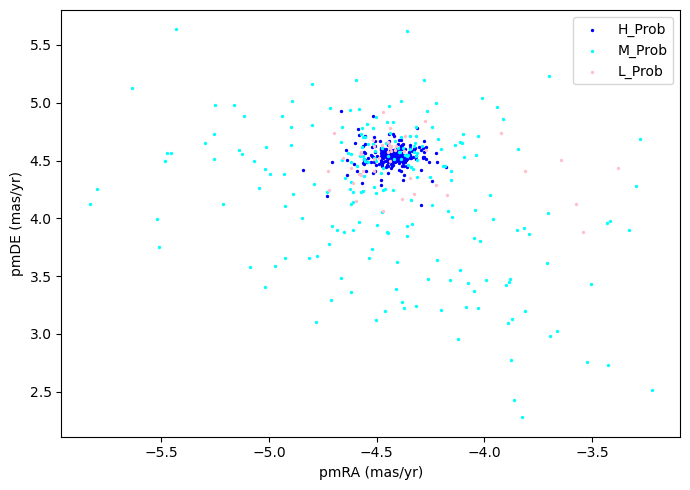

In [131]:
#GMM_membership probability determination

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

prob_1 = ds_X[ds_X['Prob_Cluster']==0]
prob_2 = ds_X[ds_X['Prob_Cluster']==1]
prob_3 = ds_X[ds_X['Prob_Cluster']==2]
prob_4 = ds_X[ds_X['Prob_Cluster']==3]


plt.scatter(prob_1.pmRA, prob_1.pmDE, color = 'blue', s = 2, label = 'H_Prob')

plt.scatter(prob_2.pmRA, prob_2.pmDE, color = 'cyan', s = 2, label = 'M_Prob') 

plt.scatter(prob_3.pmRA, prob_3.pmDE, color = 'pink', s = 2, label = 'L_Prob') 

plt.scatter(prob_4.pmRA, prob_4.pmDE, color = 'red', s = 2)

plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
#plt.xlim(-15,5)
#plt.ylim(-10,10)
plt.legend()
plt.show()

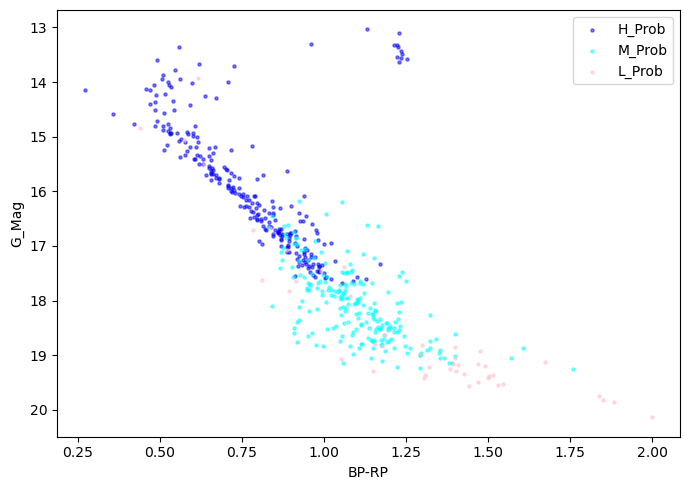

In [132]:
#HR_Plot

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

G_magn = clus.Gmag
BP_RP = [clus['BP-RP']]
#
G_p1 = prob_1.Gmag
BP_p1 = [prob_1['BP-RP']]

G_p2 = prob_2.Gmag
BP_p2 = [prob_2['BP-RP']]

G_p3 = prob_3.Gmag
BP_p3 = [prob_3['BP-RP']]

G_p4 = prob_4.Gmag
BP_p4 = [prob_4['BP-RP']]

#plt.scatter(BP_RP, -G_magn , color = 'grey', s = 2)
plt.scatter(BP_p1, G_p1, color = 'blue', s = 5, alpha=0.5, label = 'H_Prob')
plt.scatter(BP_p2, G_p2, color = 'cyan', s = 5,alpha=0.5, label ='M_Prob')
plt.scatter(BP_p3, G_p3, color = 'pink', s = 5, alpha=0.5, label ='L_Prob')
plt.scatter(BP_p4, G_p4, color = 'red', s = 1)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()
plt.legend()
#plt.legend(['High Probability', 'Moderate Probability'], loc="upper right")
plt.show()

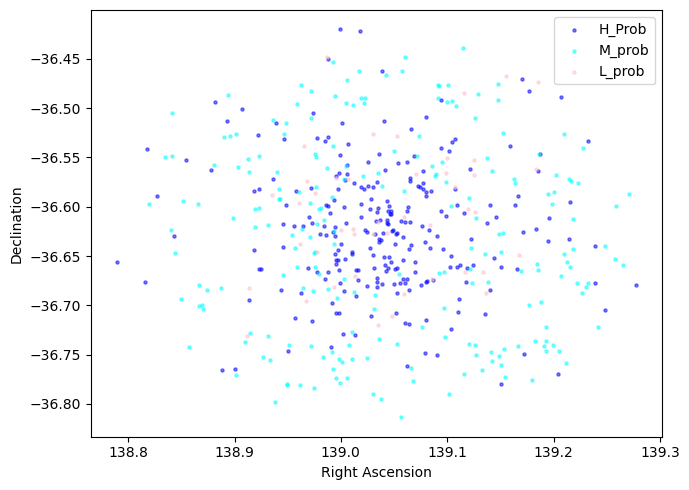

In [133]:
plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True

#plotting sky maps for probable clusters
RA_1 = prob_1._RAJ2000
DE_1 = prob_1._DEJ2000

RA_2 = prob_2._RAJ2000
DE_2 = prob_2._DEJ2000

RA_3 = prob_3._RAJ2000
DE_3 = prob_3._DEJ2000

RA_4 = prob_4._RAJ2000
DE_4 = prob_4._DEJ2000

plt.scatter(RA_1, DE_1, color = 'blue', s = 5, alpha=0.5, label = 'H_Prob')
plt.scatter(RA_2, DE_2, color = 'cyan', s = 5, alpha=0.5, label = 'M_prob')
plt.scatter(RA_3, DE_3, color = 'pink', s = 5, alpha=0.5, label = 'L_prob')
plt.scatter(RA_4, DE_4, color = 'red', s = 1)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.legend()
plt.show()

In [134]:
print('High Probabilty Stars : ', len(prob_1))
print('Moderate Probabilty Stars: ', len(prob_2))
print('Low Probability Stars: ', len(prob_3))

High Probabilty Stars :  249
Moderate Probabilty Stars:  218
Low Probability Stars:  45


In [135]:
p_s1 = len(prob_1)
p_s2 = len(prob_2)
prob_cl = p_s1 + p_s2
print('Probable Cluster Members: ', prob_cl)

Probable Cluster Members:  467


# Using DBScan instead of GMM




528


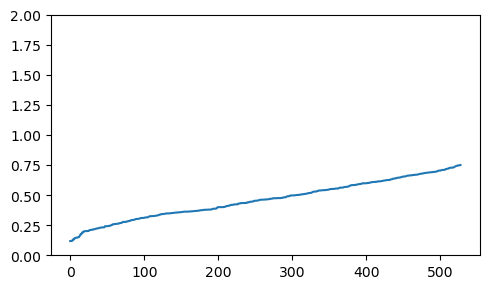

In [136]:
nb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbr = nb.fit(clus) # fitting the data to the object
distances,indices=nbr.kneighbors(clus)
print(len(clus))

distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.ylim(0,2)
#plt.xlim(-5,5000)
plt.show() # showing the plot

In [137]:
#DBSCAN ALGORITHM FOR CLUSTERING 
X_train_new = clus[['_r' , '_RAJ2000' , '_DEJ2000', 'RA_ICRS', 'DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'Gmag', 'e_Gmag', 'BPmag', 'e_BPmag' ,'RPmag', 'e_RPmag', 'BP-RP', 'Cluster']]
eps_val_new = 2.15
clustering = DBSCAN(eps = eps_val_new, min_samples = 50).fit(X_train_new)
DBB_df = X_train_new.copy()
DBB_df.loc[:, 'Cluster_New'] = clustering.labels_

In [138]:
DBB_df.Cluster_New.value_counts().to_frame().head(10)

,Cluster_New
0,528


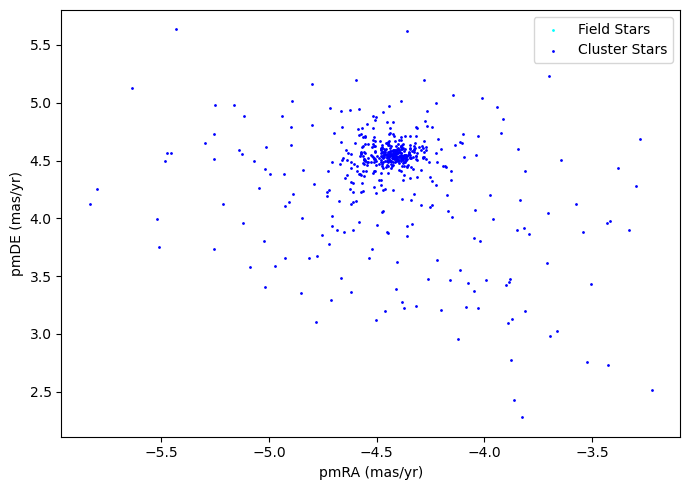

In [139]:
#plotting the cluster (red) with the field stars(black)

l_prob = DBB_df[DBB_df['Cluster_New']==-1] #least probable
#possible cluster stars
h_prob = DBB_df[DBB_df['Cluster_New']==0] 
#clus_2 = DB_df[DB_df['Cluster']==68]
#clus_3 = DB_df[DB_df['Cluster']==192]
#clus_4 = DB_df[DB_df['Cluster']==272]

plt.rcParams["figure.figsize"] = [7.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.scatter(l_prob['pmRA'], l_prob['pmDE'], s=1 , c="cyan", label = 'Field Stars')
plt.scatter(h_prob['pmRA'], h_prob['pmDE'], s=1 , color='blue', label = 'Cluster Stars')
#plt.scatter(clus_2['pmRA'], clus_2['pmDE'], s=1 , color='blue')
#plt.scatter(clus_3['pmRA'], clus_3['pmDE'], s=1 , color='green')
#plt.scatter(clus_4['pmRA'], clus_4['pmDE'], s=1 , color='pink')
plt.xlabel('pmRA (mas/yr)')
plt.ylabel('pmDE (mas/yr)')
#plt.xlim(-3,-1.5)
#plt.ylim(-1.75,-0.25)
plt.legend()
plt.show()

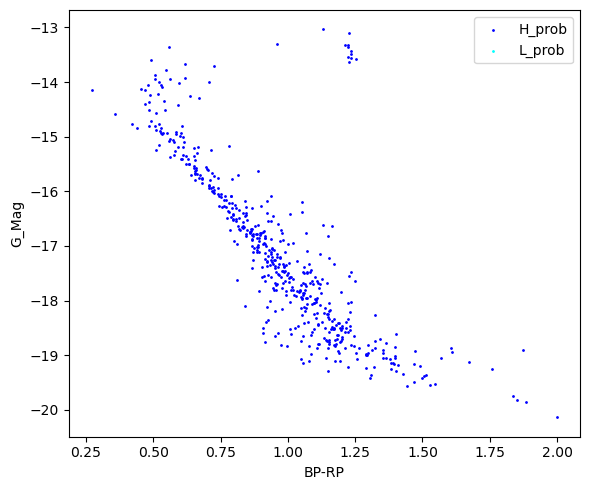

In [140]:
#cluster HR_diagram
plt.rcParams["figure.figsize"] = [6.00, 5.00]
plt.rcParams["figure.autolayout"] = True
G_mg = l_prob.Gmag
B_lp = [l_prob['BP-RP']]
G_magn = h_prob.Gmag
BP_RP = [h_prob['BP-RP']]
plt.scatter(BP_RP, -G_magn , color = 'blue', s = 1, label ='H_prob')
plt.scatter(B_lp, -G_mg , color = 'cyan', s = 1, label = 'L_prob')
plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.legend()

plt.show()

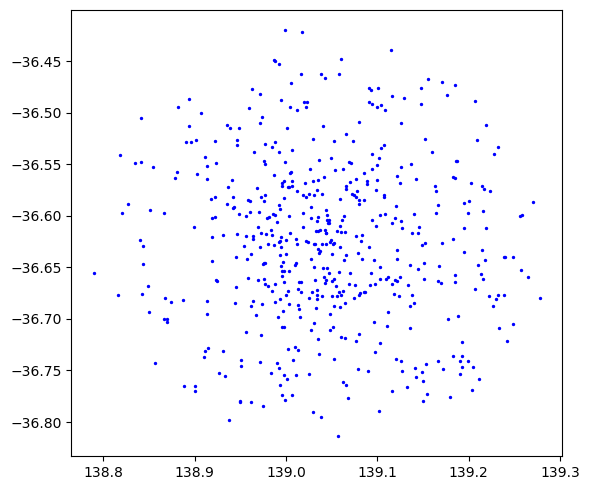

In [141]:
# sky plot of the new cluster

#low_probability
right_asc_a = l_prob._RAJ2000
dec_a = l_prob._DEJ2000
#high_probability
right_asc_b = h_prob._RAJ2000
dec_b = h_prob._DEJ2000

plt.scatter(right_asc_a, dec_a, color='cyan', s = 2, label = 'L_prob')
plt.scatter(right_asc_b, dec_b, color='blue', s = 2, label = 'H_prob')
plt.show()

In [142]:
print('Cluster Stars of High Probability: ' ,len(h_prob))

Cluster Stars of High Probability:  528
